### 0. Задание

Для выполнения этого задания требуется сгенерировать DataFrame с синтетическими данными.
DataFrame должен состоять из 10000 строк и 5 колонок.

Каждую из колонок мы предлагаем тебе создать и наполнить следующим образом:
• 1-я колонка – user_id – идентификатор пользователя. Длина user_id должна равняться 15-ти
символам. Идентификатор состоит из случайной комбинации следующих символов:
"1234567890abcdefghijk". Для каждой строки в DataFrame значение user_id формируются
случайным образом.
• 2-я колонка – order_number – номер заказа. Столбец необходимо заполнить случайными
значениями в диапазоне от 1 до 10.
• 3-я колонка – click2delivery – время, прошедшее с момента оформления заказа до вручения
клиенту. Столбец необходимо заполнить случайными значениями из нормального распределения
со средним 1440 и стандартным отклонением 200.
• 4-я колонка – order_items_sum – общая стоимость заказа. Значения для этого столбца необходимо
взять из экспоненциального распределения с параметром λ = 1, смещённого на +1.
• 5-я колонка – retention – день жизни покупателя, в который он совершил заказ. Необходимо
сгенерировать значения 1, 2, 3, 4, 5 с вероятностями 0.35, 0.25, 0.2, 0.15 и 0.05 соответственно.
• В случае, если в колонке user_id встречаются дублирующиеся значения, оставь только первое из
них

#### Cоздаем датафрейм для выполнения задания

In [26]:
# Импортируем нужные библиотеки
import pandas as pd
import random
import numpy as np
import re
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Создаем датафрейм
df = pd.DataFrame()

In [3]:
# Первая колонка - идентификатор пользователя
# Длина user_id должна равняться 15-ти символам
# Идентификатор состоит из случайной комбинации следующих символов:"1234567890abcdefghijk"

user_id = []
def generate_random_string(length):
    letters = '1234567890abcdefghijk'
    rand_string = ''.join(random.choice(letters) for i in range(length))
    user_id.append(rand_string)
for _ in range(10000):
    generate_random_string(15)
df['user_id'] = user_id

In [4]:
# Вторая колонка - номер заказа
# случайные значения в диапазоне от 1 до 10

order_number = []
for _ in range(10000):
    random_number = random.randint(0, 10)
    order_number.append(random_number)
df['order_number'] = order_number

In [5]:
# Третья колонка - время, прошедшее с момента оформления заказа до вручения клиенту
# случайные значения из нормального распределения со средним 1440 и стандартным отклонением 200

df['click2delivery'] = np.random.normal(loc=1440, scale=200, size=10000)

In [6]:
# Четвертая колонка – общая стоимость заказа
# значения из экспоненциального распределения с параметром λ = 1, смещённого на +1

order_items_sum = np.random.exponential(2, 10000)
df['order_items_sum'] = order_items_sum

In [7]:
# Пятая колонка - день жизни покупателя, в который он совершил заказ
# значения 1, 2, 3, 4, 5 с вероятностями 0.35, 0.25, 0.2, 0.15 и 0.05 соответственно

retention = []
for _ in range(10000):
    random_number_p = np.random.choice(np.arange(1, 6), p=[0.35, 0.25, 0.2, 0.15, 0.05])
    retention.append(random_number_p)
df['retention'] = retention

In [8]:
# Убираем дублирующиеся значения из колонки user_id, оставляем только первое из них

df = df.drop_duplicates(subset=['user_id'], keep='first')

In [9]:
# Итоговый датафрейм

df

,user_id,order_number,click2delivery,order_items_sum,retention
0,hjgd797f55de8jf,8,1287.006519,1.533548,2
1,b4k4162h7degg4e,4,1359.133201,0.758142,1
2,j7d886i2j0c5740,5,1569.508276,2.463929,5
3,ae9ajfh53i972ej,0,1536.153919,1.613462,3
4,1i6hi2bca3d25i0,1,1117.841581,10.725574,4
...,...,...,...,...,...
9995,d9h481dhh8795eg,4,1467.415340,1.317535,4
9996,905gkkf34e3962d,10,1226.792094,0.006361,2
9997,b9k6i8afb1h3k5j,8,1590.321609,0.205298,1
9998,g9jd8dfkd2b5123,1,1446.630966,2.079999,1


#### Задание 1.

Для всех строк исходного датасета, сгруппированных по номеру заказа, посчитать среднее значение времени доставки по группе. Результат необходимо добавить в новый столбец датафрейма.

In [10]:
df1 = df.groupby(['order_number'], as_index=False).agg({'click2delivery': 'mean'})
df1 = df1.rename(columns={'click2delivery': 'avg_click2delivery'})
df1

,order_number,avg_click2delivery
0,0,1443.941206
1,1,1434.657451
2,2,1442.554443
3,3,1437.284349
4,4,1428.844921
5,5,1434.106632
6,6,1433.371652
7,7,1429.129001
8,8,1434.260803
9,9,1434.948818


In [11]:
df = pd.merge(df,df1,on=['order_number'], how='left')
df

,user_id,order_number,click2delivery,order_items_sum,retention,avg_click2delivery
0,hjgd797f55de8jf,8,1287.006519,1.533548,2,1434.260803
1,b4k4162h7degg4e,4,1359.133201,0.758142,1,1428.844921
2,j7d886i2j0c5740,5,1569.508276,2.463929,5,1434.106632
3,ae9ajfh53i972ej,0,1536.153919,1.613462,3,1443.941206
4,1i6hi2bca3d25i0,1,1117.841581,10.725574,4,1434.657451
...,...,...,...,...,...,...
9995,d9h481dhh8795eg,4,1467.415340,1.317535,4,1428.844921
9996,905gkkf34e3962d,10,1226.792094,0.006361,2,1448.373088
9997,b9k6i8afb1h3k5j,8,1590.321609,0.205298,1,1434.260803
9998,g9jd8dfkd2b5123,1,1446.630966,2.079999,1,1434.657451


#### Задание 2.

Напиши функцию, которая принимает на вход значение user_id и возвращает строку следующего
вида: все буквы в той последовательности, в которой они встречаются в user_id, затем все цифры в user_id в той последовательности, в которой они встречаются в user_id.

#### Задание 3.
Добавь результат применения этой функции к user_id в новый столбец.

In [12]:
user_id_transformed = []

def transform_userid():
    letters = "".join(re.findall("[a-zA-Z]+", i))
    numbers = "".join(re.findall('[0-9]+', i))
    string = letters + " " + numbers
    user_id_transformed.append(string)
    
for i in df['user_id']:
    transform_userid()
    
df['user_id_transformed'] = user_id_transformed

In [13]:
df

,user_id,order_number,click2delivery,order_items_sum,retention,avg_click2delivery,user_id_transformed
0,hjgd797f55de8jf,8,1287.006519,1.533548,2,1434.260803,hjgdfdejf 797558
1,b4k4162h7degg4e,4,1359.133201,0.758142,1,1428.844921,bkhdegge 4416274
2,j7d886i2j0c5740,5,1569.508276,2.463929,5,1434.106632,jdijc 7886205740
3,ae9ajfh53i972ej,0,1536.153919,1.613462,3,1443.941206,aeajfhiej 953972
4,1i6hi2bca3d25i0,1,1117.841581,10.725574,4,1434.657451,ihibcadi 1623250
...,...,...,...,...,...,...,...
9995,d9h481dhh8795eg,4,1467.415340,1.317535,4,1428.844921,dhdhheg 94818795
9996,905gkkf34e3962d,10,1226.792094,0.006361,2,1448.373088,gkkfed 905343962
9997,b9k6i8afb1h3k5j,8,1590.321609,0.205298,1,1434.260803,bkiafbhkj 968135
9998,g9jd8dfkd2b5123,1,1446.630966,2.079999,1,1434.657451,gjddfkdb 9825123


#### Задание 4.

Вычисли моду, медиану, среднее, дисперсию и стандартное отклонение для столбцов
click2delivery, order_items_sum и retention. Построй гистограммы распределения значений в
столбцах

In [14]:
df_vis = df[['click2delivery', 'order_items_sum', 'retention']]
df_statistics = df_vis.describe().reset_index()
df_statistics = df_statistics.rename(columns = {'index':'metrics'})
df_statistics
#describe выводит информацию о числе строк, среднем значении, стандартном отклонении, минимуме, максимуме
# и значениях по 25-му, 50-му и 75-му квартилям.

,metrics,click2delivery,order_items_sum,retention
0,count,10000.000000,10000.000000,10000.00000
1,mean,1436.514827,1.995627,2.31040
2,std,201.012648,1.979736,1.23968
3,min,613.469855,0.000175,1.00000
4,25%,1300.103387,0.600680,1.00000
5,50%,1434.744040,1.406442,2.00000
6,75%,1572.804369,2.745559,3.00000
7,max,2161.617092,22.011216,5.00000


In [15]:
# добавляем моду и медиану
median_row = df_vis.median().to_list()
median_row = ['median'] + median_row
df_statistics = df_statistics.append(pd.DataFrame([median_row],
                                    columns=["metrics","click2delivery","order_items_sum","retention"]),
                                    ignore_index=True)


mode_row = df_vis.mode(axis='columns').iloc[0].to_list()
mode_row = ['mode'] + mode_row
df_statistics = df_statistics.append(pd.DataFrame([mode_row],
                                    columns=["metrics","click2delivery","order_items_sum","retention"]),
                                    ignore_index=True)

var_row = df_vis.var().to_list()
var_row = ['varience'] + var_row
df_statistics = df_statistics.append(pd.DataFrame([var_row],
                                    columns=["metrics","click2delivery","order_items_sum","retention"]),
                                    ignore_index=True)

df_statistics

C:\Users\Elena\AppData\Local\Temp\ipykernel_16392\1414886800.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_statistics = df_statistics.append(pd.DataFrame([median_row],
C:\Users\Elena\AppData\Local\Temp\ipykernel_16392\1414886800.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_statistics = df_statistics.append(pd.DataFrame([mode_row],
C:\Users\Elena\AppData\Local\Temp\ipykernel_16392\1414886800.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_statistics = df_statistics.append(pd.DataFrame([var_row],


,metrics,click2delivery,order_items_sum,retention
0,count,10000.000000,10000.000000,10000.000000
1,mean,1436.514827,1.995627,2.310400
2,std,201.012648,1.979736,1.239680
3,min,613.469855,0.000175,1.000000
4,25%,1300.103387,0.600680,1.000000
5,50%,1434.744040,1.406442,2.000000
6,75%,1572.804369,2.745559,3.000000
7,max,2161.617092,22.011216,5.000000
8,median,1434.744040,1.406442,2.000000
9,mode,1.533548,2.000000,1287.006519


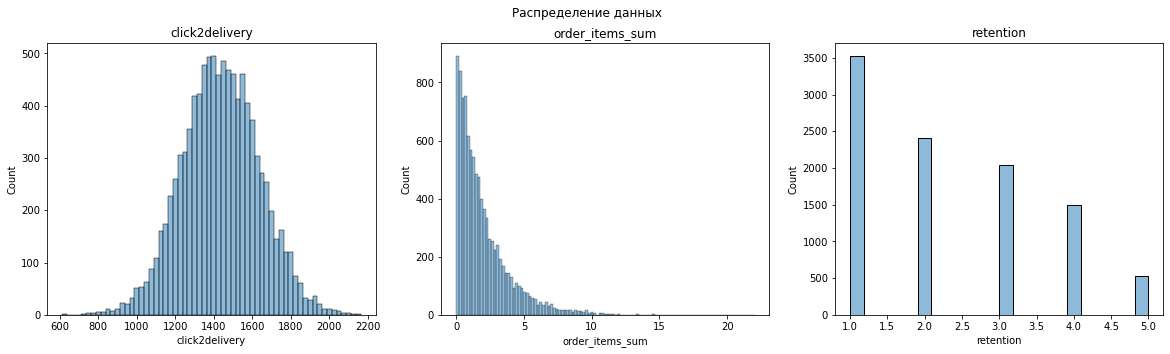

In [16]:
# Cтроим гистограммы распределения

plt.figure(figsize=(20,5))
plt.suptitle('Распределение данных')

plt.subplot(1, 3, 1)
sns.histplot(data = df_vis, x='click2delivery', alpha=0.5, kde=False)
plt.title('click2delivery')

plt.subplot(1, 3, 2)
sns.histplot(data = df_vis, x='order_items_sum', alpha=0.5, kde=False)
plt.title('order_items_sum')

plt.subplot(1, 3, 3)
sns.histplot(data = df_vis, x='retention', alpha=0.5, kde=False)
plt.title('retention')

plt.show()

#### Задание 5.
Построй график, который наиболее полно, на твой взгляд, описывает зависимость времени доставки
заказа от его номера. Обоснуй, почему ты так считаешь?

C:\Users\Elena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


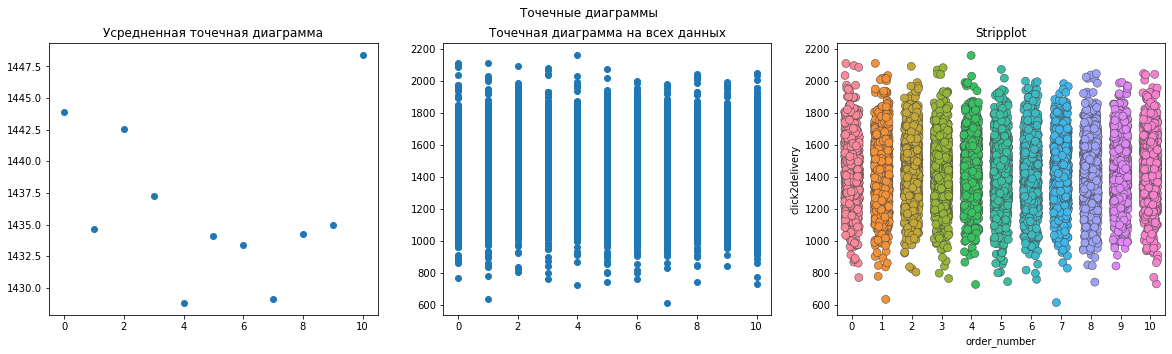

In [21]:
df_dep = df.groupby(['order_number'], as_index=False).agg({'click2delivery': 'mean'})

plt.figure(figsize=(20,5))
plt.suptitle('Точечные диаграммы')

plt.subplot(1, 3, 1)
plt.scatter(df_dep['order_number'], df_dep['click2delivery'])
plt.title('Усредненная точечная диаграмма')

plt.subplot(1, 3, 2)
plt.scatter(df['order_number'], df['click2delivery'])
plt.title('Точечная диаграмма на всех данных')

plt.subplot(1, 3, 3)
sns.stripplot(df['order_number'], df['click2delivery'], jitter=0.25, size=8, linewidth=.5)
plt.title('Stripplot')

plt.show()

#### Scatteplot — это классический вид диаграммы, используемый для изучения взаимосвязи между двумя переменными. На точечных графиках не видно зависимости между 'order_number' и 'click2delivery'.

<Figure size 432x288 with 0 Axes>

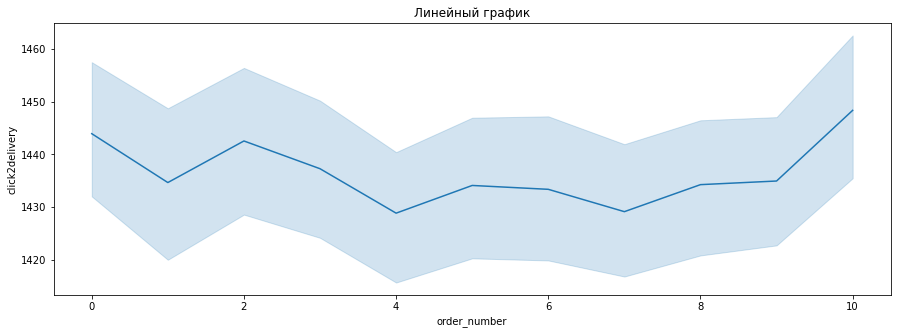

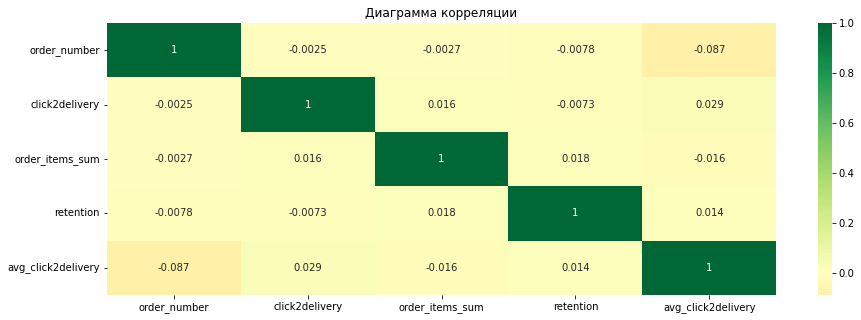

In [24]:
# гистограмма

#plt.figure(figsize=(16,9))
plt.suptitle('Зависимость времени доставки заказа от его номера')

plt.figure(figsize=(15,17))
plt.subplot(3, 1, 1)
sns.lineplot(data=df, x="order_number", y="click2delivery")
plt.title('Линейный график')

plt.figure(figsize=(15,17))
plt.subplot(3, 1, 2)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Диаграмма корреляции')

plt.show()

#### На линейном графике зависимость видно хорошо (точнее ее отсутствие). На диаграмме корреляции мы также видим, что между такими парами числовых переменных как 'order_number' и 'click2delivery' нет линейной зависимости.

Text(0.5, 1.0, 'График линейной регрессии')

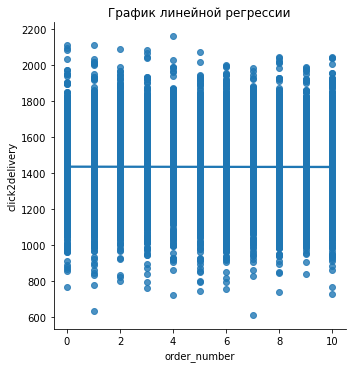

In [25]:
sns.lmplot(data=df, x="order_number", y="click2delivery")
plt.title('График линейной регрессии')

#### Наиболее полно, на мой взгляд, описывает зависимость времени доставки заказа от его номера график линейной регрессии (выше). Здесь мы видим, как две переменные изменяются по отношению друг к другу